In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
fear_greed = pd.read_csv('data/fear_greed_index.csv')
fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.date

In [3]:
trader = pd.read_csv('data/historical_data.csv')
if 'Timestamp IST' in trader.columns:
    trader['timestamp'] = pd.to_datetime(trader['Timestamp IST'], format='%d-%m-%Y %H:%M')
elif 'time' in trader.columns:
    trader['timestamp'] = pd.to_datetime(trader['time'])
else:
    raise ValueError("No valid timestamp column found")
trader['date'] = trader['timestamp'].dt.date

In [4]:
merged = pd.merge(trader, fear_greed, on='date', how='left')

In [5]:
if 'closedPnL' not in merged.columns:
    merged['closedPnL'] = np.nan  # If missing, fill with NaN for demo

if 'leverage' not in merged.columns:
    merged['leverage'] = np.nan

if 'size USD' not in merged.columns and 'Size USD' in merged.columns:
    merged['size USD'] = merged['Size USD']

In [6]:
print(merged.columns.tolist())

['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'timestamp_x', 'date', 'timestamp_y', 'value', 'classification', 'closedPnL', 'leverage', 'size USD']


In [7]:
daily_perf = merged.groupby(['Account', 'date', 'classification', 'value']).agg({
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'Side': lambda x: (x == 'BUY').sum() / len(x) if len(x) > 0 else np.nan
}).reset_index().rename(columns={'Side': 'buy_ratio'})

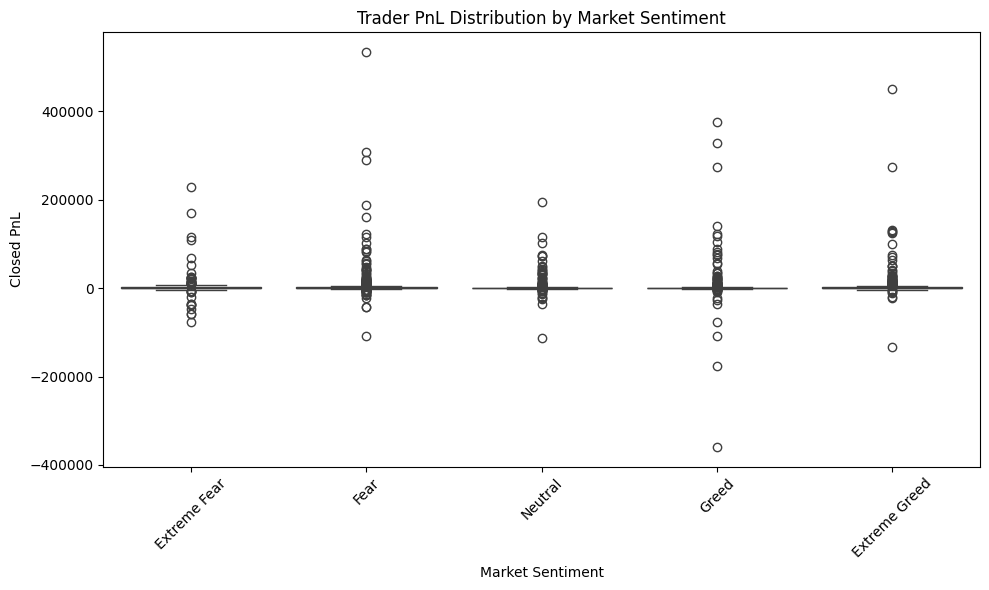

In [8]:
order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Closed PnL', data=daily_perf, order=order)
plt.title('Trader PnL Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
print(daily_perf['classification'].unique())

['Extreme Greed' 'Greed' 'Fear' 'Neutral' 'Extreme Fear']


In [11]:
print(merged['leverage'].head())
print(merged['leverage'].notna().sum())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: leverage, dtype: float64
0


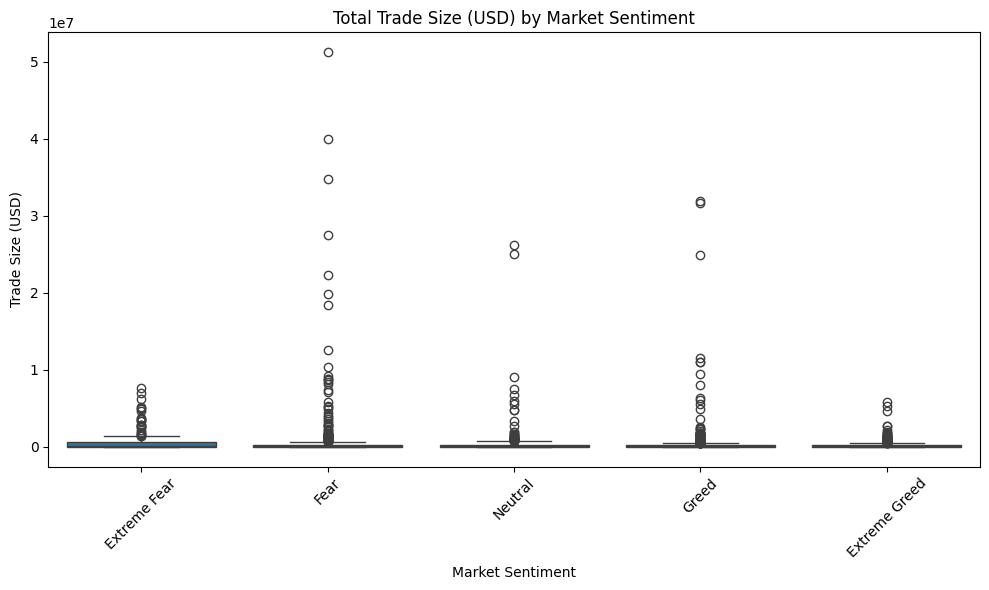

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Size USD', data=daily_perf, order=order)
plt.title('Total Trade Size (USD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Size (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

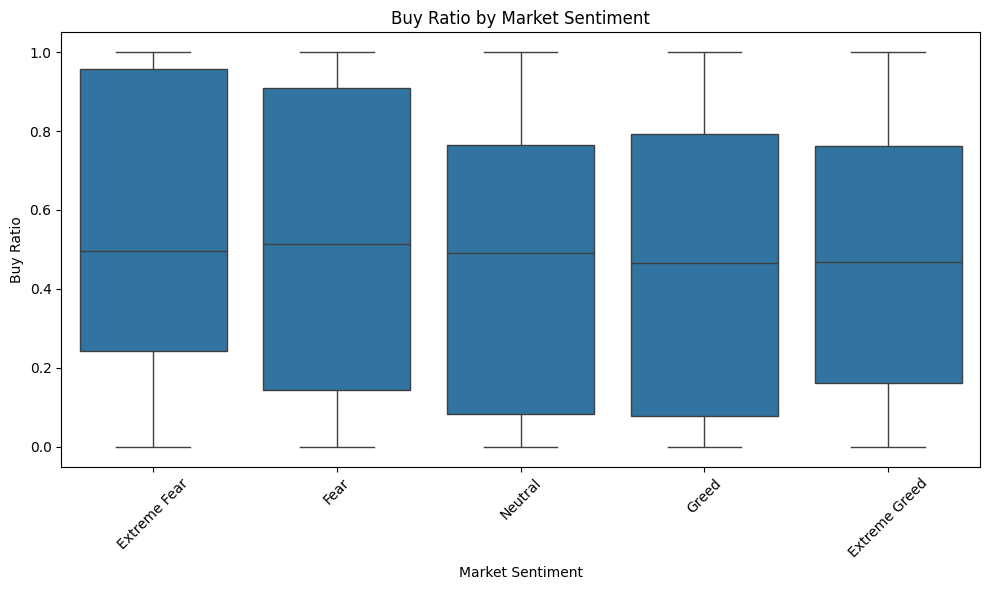

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='buy_ratio', data=daily_perf, order=order)
plt.title('Buy Ratio by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Buy Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
"""
**Note:**  
Leverage analysis was not performed because the historical data does not contain a 'leverage' column, or all values in the 'leverage' column are missing (NaN). All related code and plots were omitted accordingly.
"""

"\n**Note:**  \nLeverage analysis was not performed because the historical data does not contain a 'leverage' column, or all values in the 'leverage' column are missing (NaN). All related code and plots were omitted accordingly.\n"